In [28]:
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
#pip install scikit-learn

In [29]:
import pandas as pd
import numpy as np

# **Data Cleaning and Import**

In [30]:
maindf = pd.read_excel("C:/Users/sioku/OneDrive - Government Of Prince Edward Island/AWC/Data.xlsx")
df = maindf.copy()

In [31]:
df.head()

,SH_ACC_NO,SAMPLE_NO,SOIL_ACC_NO,DATE_RECD,DATE_SMPL,FIELD_ID,Cropping system,PER_SAND,PER_SILT,PER_CLAY,...,PER_AG_STABILITY,BNA (mg/kg),pH,P_INDEX,C_NRATIO,PER_C,PER_N,Field Capacity,Wilting Point,AWC
0,SH210802001,1,S210802001-1,20210802,20210802,324718C,Potato/Horticulture,60.7,26.1,13.2,...,24.1,22.8,5.5,14.62,11.58,1.39,0.12,0.213802,0.107870,0.105933
1,SH210802001,2,S210802001-2,20210802,20210802,324718E,Potato/Horticulture,64.9,22.6,12.5,...,34.3,25.8,5.3,14.25,12.58,1.51,0.12,0.208844,0.096730,0.112113
2,SH210802001,3,S210802001-3,20210802,20210802,324718N,Potato/Horticulture,66.5,21.7,11.9,...,36.7,26.1,5.4,17.38,12.09,1.33,0.11,0.209634,0.093623,0.116011
3,SH210802001,4,S210802001-4,20210802,20210802,324718S,Potato/Horticulture,66.6,22.8,10.5,...,18.4,25.9,5.8,17.39,12.09,1.33,0.11,0.243720,0.110129,0.133591
4,SH210802001,5,S210802001-5,20210802,20210802,377684C,Potato/Horticulture,54.3,34.8,10.9,...,45.3,40.6,6.3,10.30,11.94,1.91,0.16,0.268890,0.111186,0.157704


In [32]:
#Get the number of datasets you will be using to get an idea of how your dataset are changing overtime.
df.shape

(668, 24)

In [33]:
#printing column names before dropping columns, so know which columns were dropped
column_names = df.columns.tolist()
print(column_names)

['SH_ACC_NO', 'SAMPLE_NO', 'SOIL_ACC_NO', 'DATE_RECD', 'DATE_SMPL', 'FIELD_ID', 'Cropping system', 'PER_SAND', 'PER_SILT', 'PER_CLAY', 'TEXTURE_CLASS', 'PER_OM', 'ACTIVE_CARBON (µg/g)', 'RESPIRATION (mg/g)', 'PER_AG_STABILITY', 'BNA (mg/kg)', 'pH', 'P_INDEX', 'C_NRATIO', 'PER_C', 'PER_N', 'Field Capacity', 'Wilting Point', 'AWC']


In [34]:
columns_to_drop = [
    'SH_ACC_NO', 'SAMPLE_NO', 'SOIL_ACC_NO', 'DATE_RECD',
    'DATE_SMPL', 'FIELD_ID', 'Cropping system', 'TEXTURE_CLASS'
]
df = maindf.drop(columns=columns_to_drop)
df.shape

(668, 16)

In [35]:
#Extra data cleaning applied to identify cells with text in them like "ND" and "%"" The anomalies here especially with the C_NRATIO and PER_N. This is due to scientific instrument used in analyuzing C_NRatio and PER_N insignificant values are entered as ND for non-detected nd_variations
df.dtypes

PER_SAND                float64
PER_SILT                float64
PER_CLAY                float64
PER_OM                  float64
ACTIVE_CARBON (µg/g)      int64
RESPIRATION (mg/g)      float64
PER_AG_STABILITY        float64
BNA (mg/kg)             float64
pH                      float64
P_INDEX                 float64
C_NRATIO                 object
PER_C                   float64
PER_N                    object
Field Capacity          float64
Wilting Point           float64
AWC                     float64
dtype: object

In [36]:
#Get total of ND and insigificant values to determine if dropping will affect the data using regex
nd_count = df['C_NRATIO'].astype(str).str.contains(r'ND\**', regex=True).sum()
less_than_count = df['PER_N'].astype(str).str.contains(r'<', regex=True).sum()

print(f"Number of cells in 'C_NRatio' with 'ND**' entries: {nd_count}")
print(f"Number of cells in 'Per_N' with '<0.10' entries: {less_than_count}")

Number of cells in 'C_NRatio' with 'ND**' entries: 70
Number of cells in 'Per_N' with '<0.10' entries: 70


In [37]:
#starting the process to drop the ND values and the "<0.10" values
anomalous_values = ['ND**', 'ND***', '<0.10']
df.replace(anomalous_values, np.nan, inplace=True)
df.isna().sum()

C:\Users\sioku\AppData\Local\Temp\ipykernel_9308\2068852387.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(anomalous_values, np.nan, inplace=True)


PER_SAND                 0
PER_SILT                 0
PER_CLAY                 0
PER_OM                   0
ACTIVE_CARBON (µg/g)     0
RESPIRATION (mg/g)       0
PER_AG_STABILITY         7
BNA (mg/kg)              0
pH                       0
P_INDEX                  0
C_NRATIO                70
PER_C                    0
PER_N                   70
Field Capacity           4
Wilting Point            4
AWC                      4
dtype: int64

In [38]:
#Dropping the anomalous values from CN_Ratio and PER_N values that are in not detectable numbers.The number of rows expected to drop will be more than 70 before CN_Ratio and PER_N are not all blank on the same row.
#Mind you this code will also drop the missing Wilting point, Field capacity and AWC numbers and should correct the datatype once the missing cells are dropped.
#(668, 16) is dimension before columns were dropped
df_cleaned = df.dropna()
df_cleaned.shape

(562, 16)

In [39]:
df_cleaned.isna().sum()

PER_SAND                0
PER_SILT                0
PER_CLAY                0
PER_OM                  0
ACTIVE_CARBON (µg/g)    0
RESPIRATION (mg/g)      0
PER_AG_STABILITY        0
BNA (mg/kg)             0
pH                      0
P_INDEX                 0
C_NRATIO                0
PER_C                   0
PER_N                   0
Field Capacity          0
Wilting Point           0
AWC                     0
dtype: int64

In [40]:
#verifying that the datatypes have changed.
df_cleaned.dtypes

PER_SAND                float64
PER_SILT                float64
PER_CLAY                float64
PER_OM                  float64
ACTIVE_CARBON (µg/g)      int64
RESPIRATION (mg/g)      float64
PER_AG_STABILITY        float64
BNA (mg/kg)             float64
pH                      float64
P_INDEX                 float64
C_NRATIO                float64
PER_C                   float64
PER_N                   float64
Field Capacity          float64
Wilting Point           float64
AWC                     float64
dtype: object

In [41]:
df_cleaned.head()

,PER_SAND,PER_SILT,PER_CLAY,PER_OM,ACTIVE_CARBON (µg/g),RESPIRATION (mg/g),PER_AG_STABILITY,BNA (mg/kg),pH,P_INDEX,C_NRATIO,PER_C,PER_N,Field Capacity,Wilting Point,AWC
0,60.7,26.1,13.2,2.4,301,0.37,24.1,22.8,5.5,14.62,11.58,1.39,0.12,0.213802,0.107870,0.105933
1,64.9,22.6,12.5,2.6,311,0.35,34.3,25.8,5.3,14.25,12.58,1.51,0.12,0.208844,0.096730,0.112113
2,66.5,21.7,11.9,2.3,250,0.48,36.7,26.1,5.4,17.38,12.09,1.33,0.11,0.209634,0.093623,0.116011
3,66.6,22.8,10.5,2.3,298,0.47,18.4,25.9,5.8,17.39,12.09,1.33,0.11,0.243720,0.110129,0.133591
4,54.3,34.8,10.9,3.3,469,0.86,45.3,40.6,6.3,10.30,11.94,1.91,0.16,0.268890,0.111186,0.157704


In [42]:
#For simplicity we will rename the columns and remove all the units and proceed to feature engineering.
df_cleaned.columns = ["sand", "silt", "clay", "om", "active_carbon", "respiration", "ag_stability", "BNA", "ph", "p_index", "c_nratio", "per_carbon", "per_nitrogen", "FC", "PWP", "AWC"]

In [43]:
#before proceeding to data exploration and visualization, its essential to understand if the datasets fit within numerical categories and have no null datasets.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 666
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sand           562 non-null    float64
 1   silt           562 non-null    float64
 2   clay           562 non-null    float64
 3   om             562 non-null    float64
 4   active_carbon  562 non-null    int64  
 5   respiration    562 non-null    float64
 6   ag_stability   562 non-null    float64
 7   BNA            562 non-null    float64
 8   ph             562 non-null    float64
 9   p_index        562 non-null    float64
 10  c_nratio       562 non-null    float64
 11  per_carbon     562 non-null    float64
 12  per_nitrogen   562 non-null    float64
 13  FC             562 non-null    float64
 14  PWP            562 non-null    float64
 15  AWC            562 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 74.6 KB


# **Exploratory Data Analysis**

Data visualization and epxloration to note trends, anormalities and outliers

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [45]:
df_cleaned.head(4)

,sand,silt,clay,om,active_carbon,respiration,ag_stability,BNA,ph,p_index,c_nratio,per_carbon,per_nitrogen,FC,PWP,AWC
0,60.7,26.1,13.2,2.4,301,0.37,24.1,22.8,5.5,14.62,11.58,1.39,0.12,0.213802,0.107870,0.105933
1,64.9,22.6,12.5,2.6,311,0.35,34.3,25.8,5.3,14.25,12.58,1.51,0.12,0.208844,0.096730,0.112113
2,66.5,21.7,11.9,2.3,250,0.48,36.7,26.1,5.4,17.38,12.09,1.33,0.11,0.209634,0.093623,0.116011
3,66.6,22.8,10.5,2.3,298,0.47,18.4,25.9,5.8,17.39,12.09,1.33,0.11,0.243720,0.110129,0.133591


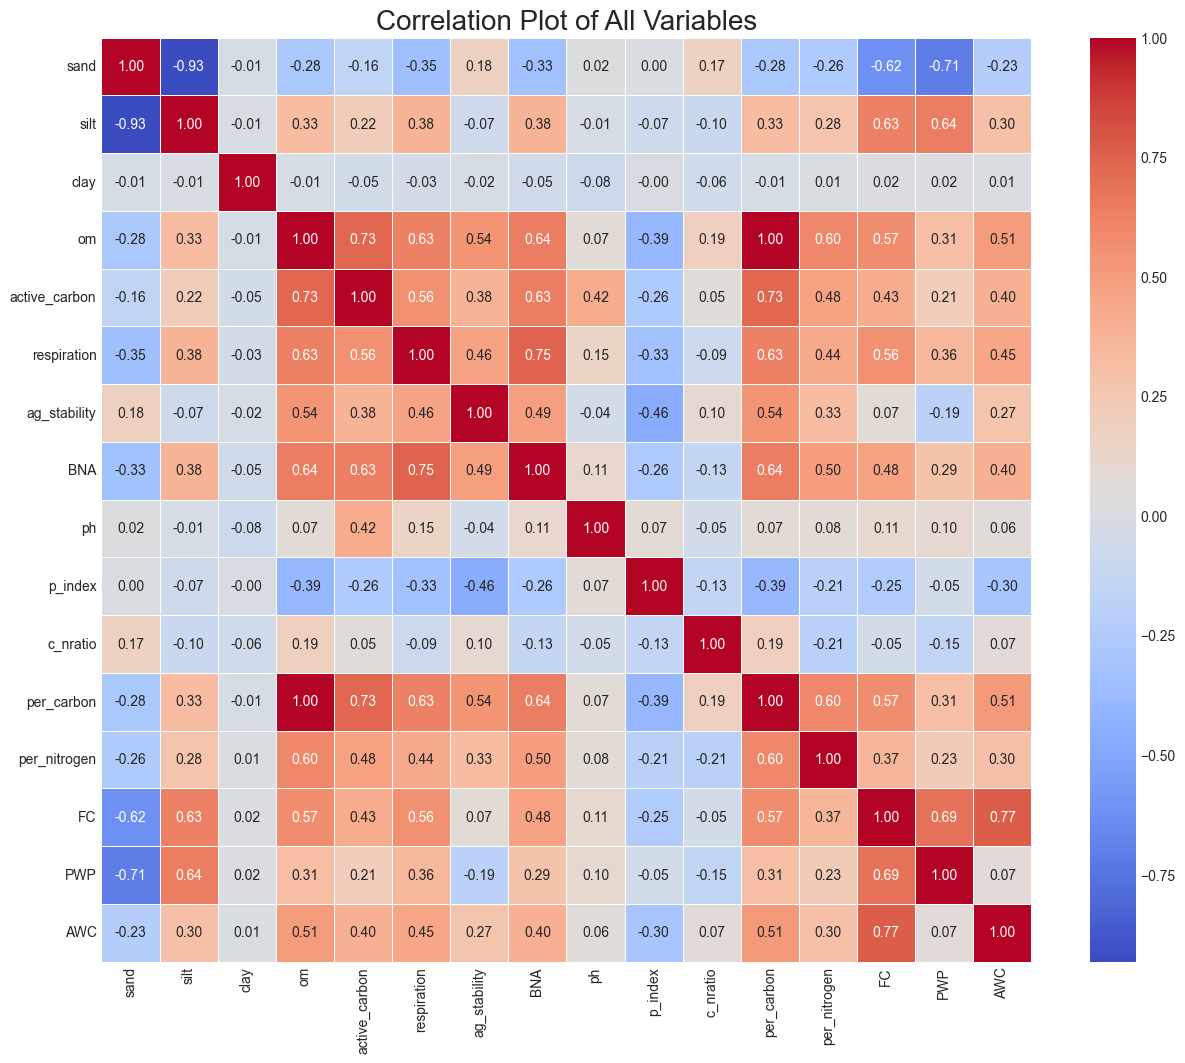

In [46]:
# fig, ax = plt.subplots(figsize=(15, 12))
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of All Variables', fontsize=20)

# fig.savefig("correlation_plot_before_FE.png")

plt.show()

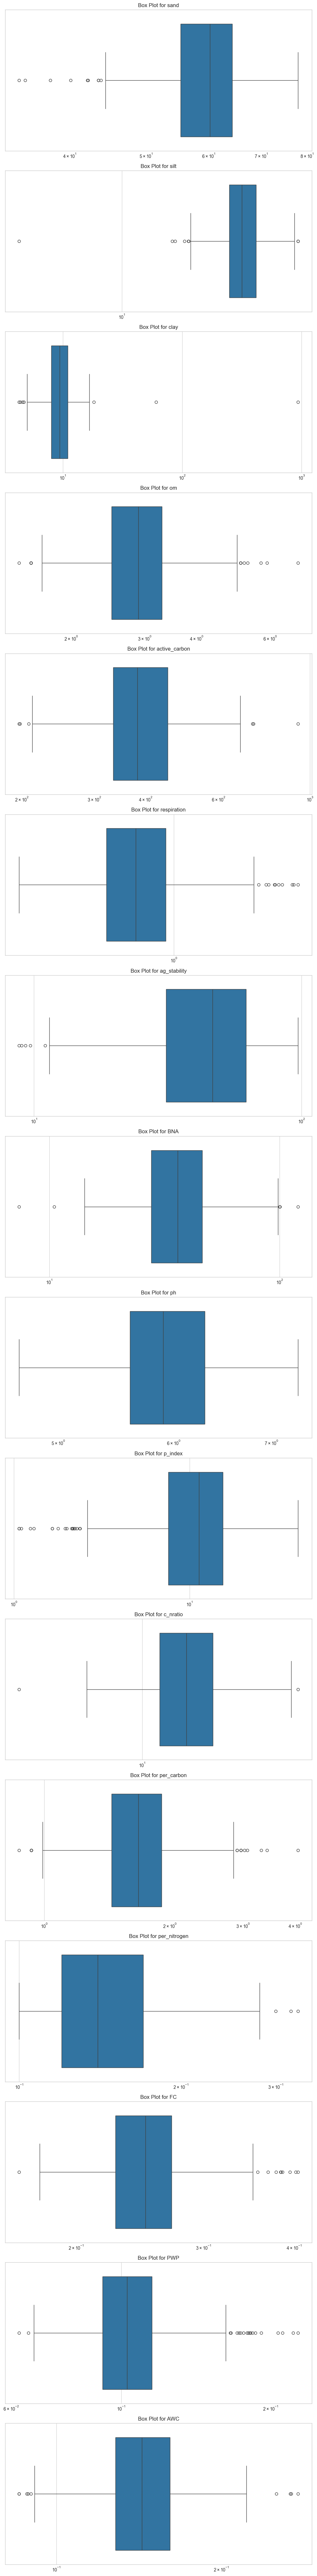

In [47]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=len(df_cleaned.columns), ncols=1, figsize=(10, 5 * len(df_cleaned.columns)))

for i, col in enumerate(df_cleaned.columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i], orient='h', log_scale=True)
    axes[i].set_title(f'Box Plot for {col}', fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

fig.savefig("box_plot_before_FE.png")

In [48]:
def find_iqr_outliers(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    return outliers

# Iterate through each numerical column and find outliers
all_outliers = {}
for col in df_cleaned.columns:
    outliers_df = find_iqr_outliers(df_cleaned, col)
    if not outliers_df.empty:
        all_outliers[col] = outliers_df
        print(f"--- Outliers found in '{col}' ---")
        print(f"Number of outliers: {len(outliers_df)}")
        # Print a sample of the outlier rows for review
        print(outliers_df[[col, 'AWC']].head())
        print("\n")

--- Outliers found in 'sand' ---
Number of outliers: 5
     sand       AWC
90   40.1  0.146552
100  35.1  0.165282
264  77.9  0.138042
411  37.8  0.176531
479  34.5  0.106179


--- Outliers found in 'silt' ---
Number of outliers: 7
     silt       AWC
89   47.2  0.141381
90   48.7  0.146552
100  50.4  0.165282
381  46.4  0.212592
411  50.4  0.176531


--- Outliers found in 'clay' ---
Number of outliers: 8
     clay       AWC
123  60.4  0.149081
192  15.6  0.133632
194  16.1  0.138362
448  16.7  0.105210
463  15.9  0.113079


--- Outliers found in 'om' ---
Number of outliers: 19
      om       AWC
73   4.6  0.145600
115  4.9  0.222278
134  5.0  0.202106
135  5.1  0.179959
145  5.0  0.184069


--- Outliers found in 'active_carbon' ---
Number of outliers: 9
     active_carbon       AWC
68             668  0.185441
73             726  0.145600
83             641  0.145285
216            936  0.170858
369            641  0.203065


--- Outliers found in 'respiration' ---
Number of outliers:

In [49]:
print(df_cleaned.describe())

             sand        silt        clay          om  active_carbon  \
count  562.000000  562.000000  562.000000  562.000000     562.000000   
mean    59.689146   30.682740   11.303737    2.953915     397.571174   
std      6.849245    5.730999   39.198179    0.689463      94.092737   
min     34.500000    3.900000    4.300000    1.500000     197.000000   
25%     55.300000   26.800000    8.000000    2.500000     333.000000   
50%     60.250000   30.100000    9.400000    2.900000     381.500000   
75%     64.275000   34.300000   11.000000    3.300000     452.000000   
max     77.900000   50.400000  936.000000    7.000000     936.000000   

       respiration  ag_stability         BNA          ph     p_index  \
count   562.000000    562.000000  562.000000  562.000000  562.000000   
mean      0.833772     47.323665   39.051957    5.933630   12.126139   
std       0.351283     20.017364   15.602819    0.486272    6.314876   
min       0.310000      8.800000    7.400000    4.700000    1.0

**Missing text explaing the trends for the EDA** - DELETE THIS WHEN SATISFIED

We are seeing some logical interactions between some of the variables that fall within soil texture parameters (PER_SAND, PER_SILT, PER_CLAY) and between soil components and their derived properties (PER_OM, OC, PER_C, PER_N). The soil components and their derived properties is very visible in the Corr plot

# **Outlier Handing (Removal and Identification)**
Removing outliers after identiying the outliers.

In [50]:
is_not_outlier = pd.Series([True] * len(df_cleaned), index=df_cleaned.index)

# Iterate through each numerical column and find the outlier mask
for col in df_cleaned.columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a temporary mask for the current column
    # The condition below is True for values *within* the bounds
    col_is_not_outlier = (df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)
    
    # Combine the new mask with the overall mask using the AND (&) operator
    is_not_outlier = is_not_outlier & col_is_not_outlier

# Apply the final combined mask to your DataFrame to create a new, clean DataFrame
df_cleaned_no_outliers = df_cleaned[is_not_outlier]

# Print the results to see how many rows were removed
print(f"Original shape: {df_cleaned.shape}")
print(f"New shape after removing outliers: {df_cleaned_no_outliers.shape}")

Original shape: (562, 16)
New shape after removing outliers: (457, 16)


**Spliting the dataset before feature engineering**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_main_outliers = df_cleaned_no_outliers.copy()
df_main_outliers = df_main_outliers.drop('AWC', axis=1)
X = df_main_outliers[["sand", "silt", "clay","active_carbon", "respiration", "ag_stability", "BNA", "ph", "p_index", "c_nratio", "per_carbon", "per_nitrogen",]] #removed organic matter
y = df_main_outliers['PWP'] #starting with PWP first before AC

X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train_outliers = X_train_outliers.reset_index(drop=True)
X_test_outliers = X_test_outliers.reset_index(drop=True)
y_train_outliers = y_train_outliers.reset_index(drop=True)
y_test_outliers =y_test_outliers.reset_index(drop=True)

In [54]:
print(X_train_outliers.shape)
print(X_test_outliers.shape)
print(y_train_outliers.shape)
print(y_test_outliers.shape)

(365, 12)
(92, 12)
(365,)
(92,)


**No need for interaction terms, because the MARS dataset doesnt use it**

In [55]:
# ----------------------------------------------------
# Saving datasets WITHOUT interaction terms
# ----------------------------------------------------

# Save the training and testing features
X_train_outliers.to_excel("X_train_outliers.xlsx", index=False)
X_test_outliers.to_excel("X_test_outliers.xlsx", index=False)

# Save the training and testing target variables
y_train_outliers.to_excel("y_train_outliers.xlsx", index=False)
y_test_outliers.to_excel("y_test_outliers.xlsx", index=False)

print("All datasets have been saved to Excel files.")


All datasets have been saved to Excel files.


# **Data Split**

## Data Split for df_main using a 80/20 split

In [56]:
df_cleaned.head(3)
# df_cleaned.columns

,sand,silt,clay,om,active_carbon,respiration,ag_stability,BNA,ph,p_index,c_nratio,per_carbon,per_nitrogen,FC,PWP,AWC
0,60.7,26.1,13.2,2.4,301,0.37,24.1,22.8,5.5,14.62,11.58,1.39,0.12,0.213802,0.107870,0.105933
1,64.9,22.6,12.5,2.6,311,0.35,34.3,25.8,5.3,14.25,12.58,1.51,0.12,0.208844,0.096730,0.112113
2,66.5,21.7,11.9,2.3,250,0.48,36.7,26.1,5.4,17.38,12.09,1.33,0.11,0.209634,0.093623,0.116011


In [57]:
from sklearn.model_selection import train_test_split
# import pandas as pd: we called this in the inital cell

In [58]:
#Spliting the df_main for MER and Gene processing
df_main = df_cleaned.copy()
df_main = df_main.drop('AWC', axis=1)
X = df_main[["sand", "silt", "clay","active_carbon", "respiration", "ag_stability", "BNA", "ph", "p_index", "c_nratio", "per_carbon", "per_nitrogen",]] #removed organic matter
y = df_main['PWP'] #starting with PWP first before AC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 12)
(113, 12)
(449,)
(113,)


## Data Split for df_inter using a 80/20 split

In [61]:
#Spliting the df_main for MER and Gene processing
df_inter = df_cleaned.copy()
df_inter = df_inter.drop('AWC', axis=1)
X = df_inter[["sand", "silt", "clay", "active_carbon", "respiration", "ag_stability", "BNA", "ph", "p_index", "c_nratio", "per_carbon", "per_nitrogen",]] # I removed organic matter from here
y = df_inter['PWP'] #starting with PWP first before AC

X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(X, y, test_size=0.2, random_state=100)

In [62]:
X_train_inter = X_train.reset_index(drop=True)
X_test_inter = X_test.reset_index(drop=True)
y_train_inter = y_train.reset_index(drop=True)
y_test_inter = y_test.reset_index(drop=True)

In [63]:
print(X_train_inter.shape)
print(X_test_inter.shape)
print(y_train_inter.shape)
print(y_test_inter.shape)

(449, 12)
(113, 12)
(449,)
(113,)


Information: on how datasplit was done

# **Feature Engineering**

Creating interaction terms for both the x_train and X_test

In [64]:
from itertools import combinations

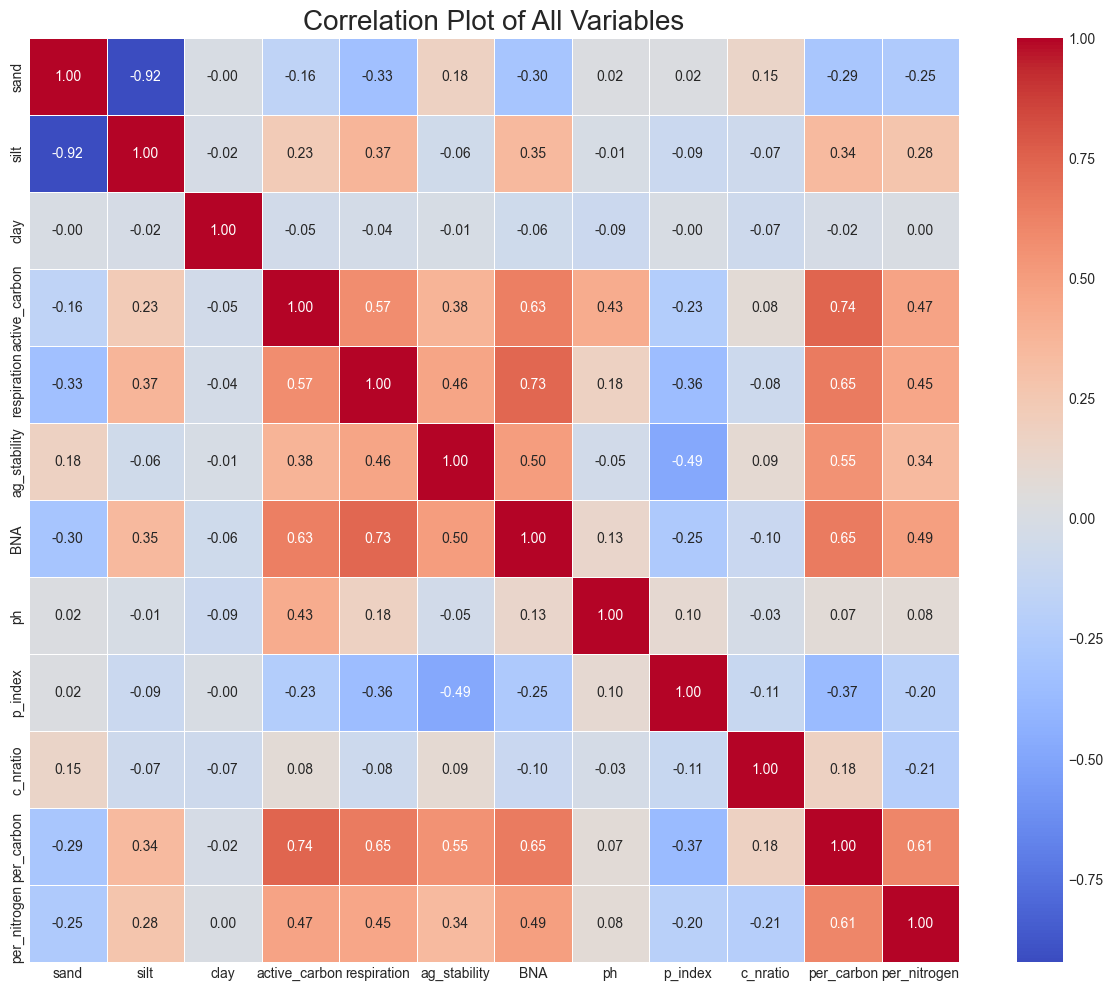

In [65]:
#taking a second look at the correlation before creating the interaction terms
correlation_matrix_x_train = X_train.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_x_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of All Variables', fontsize=20)
plt.show()

In [66]:
#viewing column names
column_names_X_train = X_train.columns
column_names_index = list(column_names_X_train)
column_names_index

['sand',
 'silt',
 'clay',
 'active_carbon',
 'respiration',
 'ag_stability',
 'BNA',
 'ph',
 'p_index',
 'c_nratio',
 'per_carbon',
 'per_nitrogen']

In [67]:
#X_train Interaction terms
inter_columns = ['sand', 'silt', 'active_carbon', 'ph']

interaction_pairs = list(combinations(inter_columns, 2))
for col1, col2 in interaction_pairs:
    new_col_name = f'{col1}_x_{col2}'
    X_train_inter[new_col_name] = X_train_inter[col1] * X_train_inter[col2]

print([col for col in X_train_inter.columns if '_x_' in col])

['sand_x_silt', 'sand_x_active_carbon', 'sand_x_ph', 'silt_x_active_carbon', 'silt_x_ph', 'active_carbon_x_ph']


In [68]:
#X_test Interaction terms
inter_columns = ['sand', 'silt', 'active_carbon', 'ph']

interaction_pairs = list(combinations(inter_columns, 2))
for col1, col2 in interaction_pairs:
    new_col_name = f'{col1}_x_{col2}'
    X_test_inter[new_col_name] = X_test_inter[col1] * X_test_inter[col2]

print([col for col in X_test_inter.columns if '_x_' in col])

['sand_x_silt', 'sand_x_active_carbon', 'sand_x_ph', 'silt_x_active_carbon', 'silt_x_ph', 'active_carbon_x_ph']


In [69]:
X_train_inter.head(3)
# X_test_inter.head(3)

,sand,silt,clay,active_carbon,respiration,ag_stability,BNA,ph,p_index,c_nratio,per_carbon,per_nitrogen,sand_x_silt,sand_x_active_carbon,sand_x_ph,silt_x_active_carbon,silt_x_ph,active_carbon_x_ph
0,59.0,31.7,9.3,343,0.85,49.1,36.1,5.1,9.04,9.53,1.62,0.17,1870.30,20237.0,300.90,10873.1,161.67,1749.3
1,60.7,26.1,13.2,301,0.37,24.1,22.8,5.5,14.62,11.58,1.39,0.12,1584.27,18270.7,333.85,7856.1,143.55,1655.5
2,49.6,39.9,10.5,422,0.71,31.2,48.7,5.7,17.43,13.13,1.97,0.15,1979.04,20931.2,282.72,16837.8,227.43,2405.4


# **Save files as excel**

In [70]:
# ----------------------------------------------------
# Saving datasets WITHOUT interaction terms
# ----------------------------------------------------

# Save the training and testing features
X_train.to_excel("X_train.xlsx", index=False)
X_test.to_excel("X_test.xlsx", index=False)

# Save the training and testing target variables
y_train.to_excel("y_train.xlsx", index=False)
y_test.to_excel("y_test.xlsx", index=False)

# ----------------------------------------------------
# Saving datasets WITH interaction terms
# ----------------------------------------------------

# Save the training and testing features with interaction terms
X_train_inter.to_excel("X_train_inter.xlsx", index=False)
X_test_inter.to_excel("X_test_inter.xlsx", index=False)

# Save the training and testing target variables
y_train_inter.to_excel("y_train_inter.xlsx", index=False)
y_test_inter.to_excel("y_test_inter.xlsx", index=False)

print("All datasets have been saved to Excel files.")


All datasets have been saved to Excel files.
